作業1：

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：
Q1. 你選的這組資料為何重要
    Dataset: Heart Disease UCI(https://www.kaggle.com/ronitf/heart-disease-uci)
    這組資料是唯一ㄧ組經常被機器學習的資料科學家拿來使用的心臟相關疾病資料
    資料呈現病人的心臟疾病狀態，以0或1作為分類的類別，0為沒有心臟相關疾病，1代表有
    是binary classification的一個應用。

Q2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
    資料提供者的Kaggle ID是ronitf，
    但其實這組資料是由Cleveland, Hungary, Switzerland, and the VA Long Beach這四個單位共同研究，
    搜集而來的臨床資料，(http://archive.ics.uci.edu/ml/datasets/heart+disease)
    統一放在 Cleveland database 中。
    
Q3. 蒐集而來的資料型態為何
    這個資料集本身有76組attributes，但是研究人員大多傾向使用其中的14組attributes，共303筆資料
    這其中包括
        。年齡(age)：由29~77之間的整數組成, integer, 數值型
        。性別(sex)：1 = male; 0 = female, integer, 類別型
        。胸痛(cp, chest pain type)： 0~3, interger, 類別型
        。trestbps(resting blood pressure (in mm Hg on admission to the hospital))：90~200之間的連續整數
        。chol(serum cholestoral in mg/dl)：126~564之間的連續整數
        。fbs(fasting blood sugar > 120 mg/dl)：1 = true; 0 = false, 類別型
        。restecg(resting electrocardiographic results)：0~3, interger, 類別型
        。thalach(maximum heart rate achieved):71~202的連續整數, 數值型      
        。exang(exercise induced angina)：1 = yes; 0 = no, 類別型
        。oldpeak(ST depression induced by exercise relative to rest)：大於0的連續型數值，有小數點
        。slope(the slope of the peak exercise ST segment)：0, 1, 2的類別型數值
        。ca：number of major vessels (0-3) colored by flourosopy, 類別型
        。thal：3 = normal; 6 = fixed defect; 7 = reversable defect, 類別型
        。target：0 = no presence, 1 = presence, 分兩類

Q4. 這組資料想解決的問題如何評估
    將303筆資料切成training和testing或是用K-fold cross validation
    可以評估訓練出來的模型是否能正確的預測病人心臟疾病的與否。

作業2：

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

Q1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
    提升業績的定義為單位時間內載客所得的收入提升。
    假設：天氣的好壞會影響載客量的多寡以及行車路線進而影響收入
    預期雨天的載客量會較晴天多，尖峰時段的載客量也會比離峰時段多。
Q2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
    每一天每一個時段的載客量資訊及氣候資訊
    氣候資訊可以透過中央氣象台資料蒐集
    同時透過訂車系統可以確定成交資訊如：上車時間地點、抵達目的地時間地點
    若是尖峰時段可能會因為塞車造成單位時間載客數偏低，因此路線交通資訊也很重要，
    可以透過google map或其他的交通資訊搜集相關資料。
    
Q3. 蒐集而來的資料型態為何
    載客日期：date
    載客時間：time
    載客地點：string
    天氣：降雨機率(numeric)、氣溫(numeric)
Q4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)
    以未來某一天的尖峰時段及離峰時段及晴天及雨天之載客量做為答案
    利用模型進行預測該時段在晴天或雨天時的載客量表現，藉此作為驗證。

# 統計指標實作範例
## 常見於迴歸問題的評估指標
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

In [1]:
import numpy as np
import matplotlib.pyplot as plt

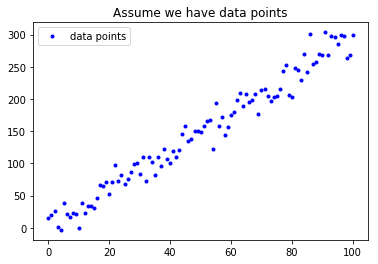

In [2]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

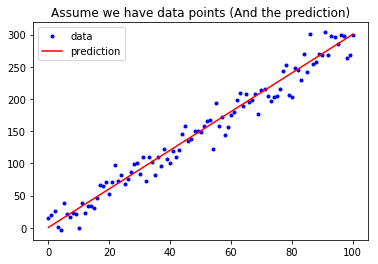

In [3]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [4]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 12.535


In [6]:
def mean_squared_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    mse = MSE = sum((y-y_hat)**2)/len(y)
    return mse
#MSE = mean_squared_error(y, y_hat)
#print("The Mean square error is %.3f" % (MSE))

# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))


The Mean squared error is 253.852
The Mean absolute error is 12.535


In [7]:
"""
利用現成的工具進行驗證，確認無誤。
"""
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_hat)
print("The Mean square error is %.3f" % (mse))

The Mean square error is 253.852


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)